In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader.data as web
%matplotlib inline

In [2]:
plt.style.use('ggplot')

In [3]:
start=dt.datetime(2015,1,1)
end=dt.datetime.now()

In [5]:
df=web.DataReader("TSLA","yahoo",start,end)

In [6]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,225.679993,222.250000,223.089996,222.410004,2297500,222.410004
2015-01-02,223.250000,213.259995,222.869995,219.309998,4764400,219.309998
2015-01-05,216.500000,207.160004,214.550003,210.089996,5368500,210.089996
2015-01-06,214.199997,204.210007,210.059998,211.279999,6261900,211.279999
2015-01-07,214.779999,209.779999,213.350006,210.949997,2968400,210.949997


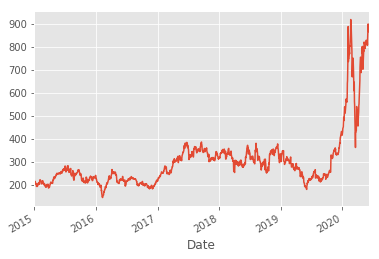

In [9]:
df['Close'].plot()

In [11]:
df.to_csv('TSLA.csv')

In [13]:
df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)

# Moving Average of 100 days 

In [18]:
df['ma100']=df['Adj Close'].rolling(100,min_periods=0).mean()

In [19]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,ma100
Date,,,,,,,
2014-12-31,225.679993,222.250000,223.089996,222.410004,2297500,222.410004,222.410004
2015-01-02,223.250000,213.259995,222.869995,219.309998,4764400,219.309998,220.860001
2015-01-05,216.500000,207.160004,214.550003,210.089996,5368500,210.089996,217.269999
2015-01-06,214.199997,204.210007,210.059998,211.279999,6261900,211.279999,215.772499
2015-01-07,214.779999,209.779999,213.350006,210.949997,2968400,210.949997,214.807999


<BarContainer object of 1367 artists>

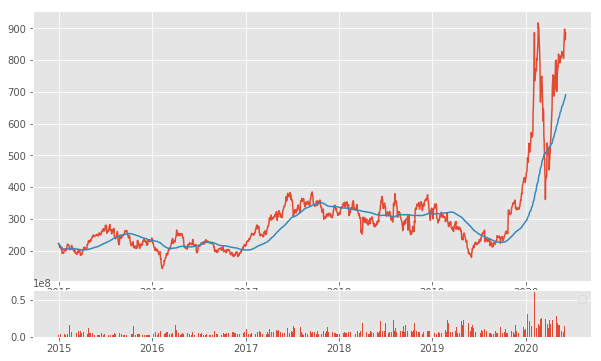

In [29]:
plt.figure(figsize=(10,6))
ax1=plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2=plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)
ax1.plot(df.index,df['Adj Close'])
ax1.plot(df.index,df['ma100'])

ax2.bar(df.index,df['Volume'])

In [49]:
import matplotlib.dates as mpl_dates

In [43]:
#import mpl_finance
from mpl_finance import candlestick_ohlc

In [51]:
df['Date']=pd.to_datetime(df['Date'])

KeyError: 'Date'

In [ ]:
df['Date']=df['Date'].apply(mpl_dates.date2num)

In [44]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width=5, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()

NameError: name 'mdates' is not defined

In [52]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()

In [54]:
df_ohlc.head()

,open,high,low,close
Date,,,,
2014-12-31,222.410004,222.410004,206.660004,206.660004
2015-01-10,202.210007,204.250000,191.869995,193.070007
2015-01-20,191.929993,206.550003,191.929993,205.199997
2015-01-30,203.600006,220.990005,203.600006,217.360001
2015-02-09,217.479996,217.479996,202.880005,204.460007


In [55]:
df_volume = df['Volume'].resample('10D').sum()

In [56]:
df_ohlc = df_ohlc.reset_index()

In [58]:
df_ohlc['Date'] = df_ohlc['Date'].map(mpl_dates.date2num)

In [59]:
df_ohlc.head()

,Date,open,high,low,close
0,735598.0,222.410004,222.410004,206.660004,206.660004
1,735608.0,202.210007,204.250000,191.869995,193.070007
2,735618.0,191.929993,206.550003,191.929993,205.199997
3,735628.0,203.600006,220.990005,203.600006,217.360001
4,735638.0,217.479996,217.479996,202.880005,204.460007


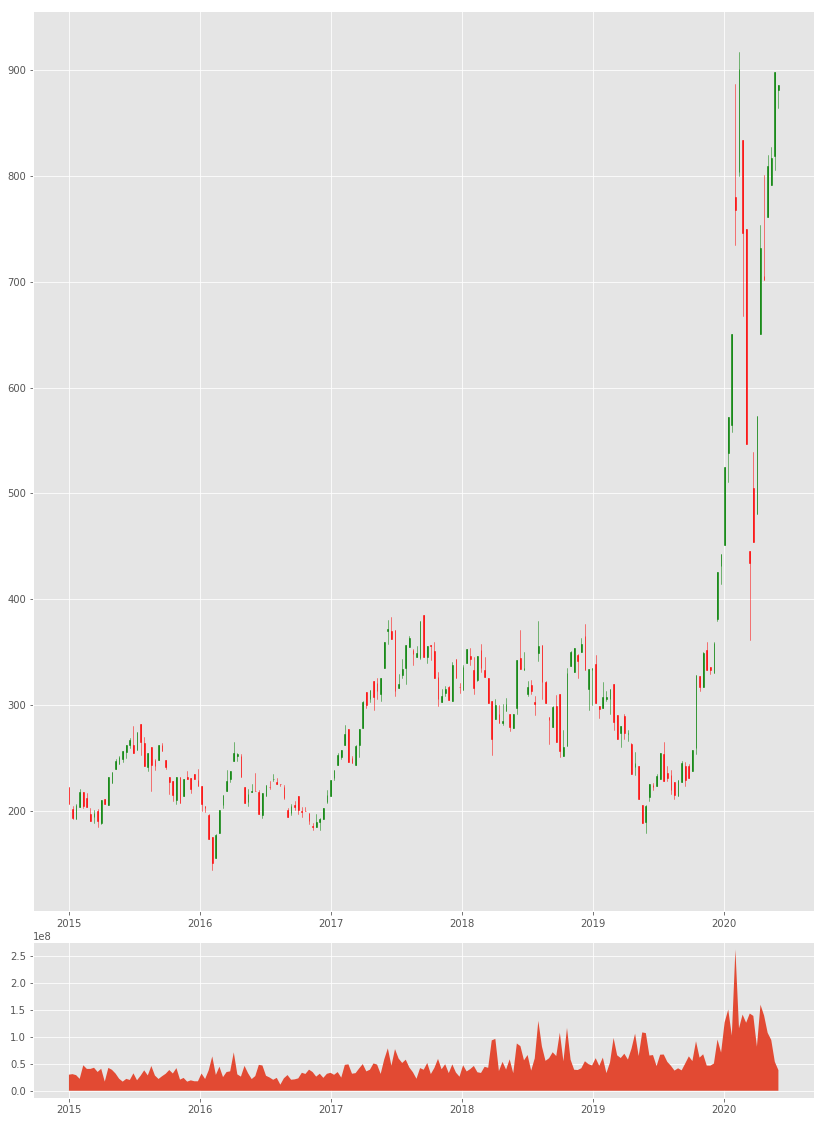

In [69]:

fig = plt.figure(figsize=(14,20))
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)
ax1.xaxis_date()
candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mpl_dates.date2num),df_volume.values,0)
plt.show()